In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import sys
import pyodbc as odbc

In [14]:
cnxn = odbc.connect('Driver={SQL Server};'
                    'Server=DESKTOP-S40OV4H;'
                    'Database=Sum_capstone_proj;'
                    'Trusted_Connection=yes;')

In [15]:
#Importing the dataset, read straight from SQL
dataset=pd.read_sql_query('SELECT * FROM diamonds_shuf69sclnzparm_50k', cnxn)
dataset.head(10)

,depth_scaled,table_scaled,cut_scaled,color_scaled,clarity_scaled,carat_scaled,price_USD,index_org
0,0.733344,-0.204605,0.981473,0.937163,-0.638095,-0.291008,1901.0,47803.0
1,0.105120,-0.652139,0.981473,1.525021,1.183265,0.552862,13588.0,25068.0
2,0.942753,0.242928,-1.705279,0.937163,0.576145,-0.122234,2824.0,518.0
3,1.570978,-1.994739,-1.705279,-1.414272,0.576145,0.426281,3763.0,5135.0
4,-0.523105,1.137995,0.085889,-0.826413,-0.638095,1.481118,9820.0,21753.0
5,0.384331,1.137995,-0.809695,-0.826413,-1.245215,1.227957,6369.0,15929.0
6,-0.872119,-0.652139,0.981473,0.937163,-0.030975,-1.029394,872.0,34634.0
7,-1.919161,0.242928,-1.705279,1.525021,-1.245215,0.257507,3936.0,5914.0
8,-0.383500,0.690462,-0.809695,-0.238555,1.790385,-1.008297,876.0,34730.0
9,-0.174092,1.585529,-1.705279,1.525021,-1.245215,1.502215,8742.0,20344.0


In [16]:
#Defining X and y
X=dataset.iloc[:,0:6].values
y=dataset.iloc[:,-2].values

In [17]:
X

array([[ 0.73334442, -0.20460509,  0.98147332,  0.93716275, -0.63809506,
        -0.29100792],
       [ 0.10511955, -0.65213854,  0.98147332,  1.52502147,  1.18326497,
         0.55286174],
       [ 0.94275271,  0.24292836, -1.70527938,  0.93716275,  0.57614496,
        -0.12223399],
       ...,
       [ 0.73334442, -1.09967199, -0.80969515, -0.23855468,  1.79038498,
        -1.05049061],
       [ 3.38584943,  0.24292836, -2.60086361,  0.34930404, -1.24521508,
         0.46847477],
       [ 0.10511955, -0.20460509,  0.98147332, -0.23855468,  1.79038498,
        -0.48087859]])

In [18]:
y

array([ 1901., 13588.,  2824., ...,   635.,  3633.,  2217.])

In [19]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=  train_test_split(X,y,test_size=0.2, random_state=42)

In [20]:
#Training the Model
import time
start = time.time()

#Training the Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

train_time = time.time() - start

In [21]:
train_time

0.006981372833251953

In [22]:
import time
start = time.time()
y_pred=regressor.predict(X_test)
y_pred10k_time = time.time() - start
y_pred

array([3565.66370791,  102.7924272 , 2942.63553735, ...,  766.99220623,
       5034.35165849,  946.34335186])

In [23]:
y_test

array([2927.,  610., 2220., ...,  899., 4588.,  825.])

In [24]:
from sklearn import metrics
print("Mean squared error",metrics.mean_squared_error(y_test,y_pred))
print("Mean absolute error",metrics.mean_absolute_error(y_test,y_pred))
print("R2_Score:",metrics.r2_score(y_test,y_pred))

Mean squared error 1560525.1564886842
Mean absolute error 859.529028859479
R2_Score: 0.8998600699051039


In [25]:
y_pred10k_time

0.0029625892639160156

In [26]:
regressor.score(X_train, y_train)

0.9052711514780633

In [27]:
regressor.score(X_test, y_test)

0.8998600699051039

In [28]:
trained_records = []
trained_records.append({
    'model': 'LinearRegression',
    'train_time': train_time,
    'test_time': y_pred10k_time,
    'train_r2': regressor.score(X_train, y_train),
    'test_r2': regressor.score(X_test, y_test),
    'test_MSE': metrics.mean_squared_error(y_test,y_pred),
    'test_MAE': metrics.mean_absolute_error(y_test,y_pred)})
trained_records

[{'model': 'LinearRegression',
  'train_time': 0.006981372833251953,
  'test_time': 0.0029625892639160156,
  'train_r2': 0.9052711514780633,
  'test_r2': 0.8998600699051039,
  'test_MSE': 1560525.1564886842,
  'test_MAE': 859.529028859479}]

In [29]:
trained_records = pd.DataFrame(trained_records,columns=['model','train_time','test_time','train_r2','test_r2','test_MSE','test_MAE'])
trained_records

,model,train_time,test_time,train_r2,test_r2,test_MSE,test_MAE
0,LinearRegression,0.006981,0.002963,0.905271,0.89986,1.560525e+06,859.529029


In [30]:
import sys
import pyodbc as odbc

cnxn = odbc.connect('Driver={SQL Server};'
                    'Server=DESKTOP-S40OV4H;'
                    'Database=Sum_capstone_proj;'
                    'Trusted_Connection=yes;')

In [31]:
#Model must be in text format.

cursor = cnxn.cursor()
trained_insert = '''INSERT INTO ML_Parameter_Score_05oct (Model,Training_Time_40k_rows,Test_Time_10k_rows,Train_r2_score,Test_r2_score,Test_MSE,Test_MAE)
               VALUES (?,?,?,?,?,?,?)
'''
for rec in trained_records.iterrows():
    values = (
        rec[1]['model'],
        rec[1]['train_time'],
        rec[1]['test_time'],
        rec[1]['train_r2'],
        rec[1]['test_r2'],
        rec[1]['test_MSE'],
        rec[1]['test_MAE']
    )
cursor.execute(trained_insert, values)
cnxn.commit()
cursor.close()
print("Input Parameter_Score Done!")

Input Parameter_Score Done!


In [32]:
Comparison=pd.DataFrame({"Actual:":y_test,"Predicted:":y_pred})
print(Comparison.to_string())

      Actual:    Predicted:
0      2927.0   3565.663708
1       610.0    102.792427
2      2220.0   2942.635537
3      5147.0   6268.240824
4     17227.0  14423.426877
5      4739.0   5719.888518
6      1024.0   1166.999728
7      5798.0   4955.979311
8      6350.0   7721.675680
9       556.0    367.451581
10      880.0      5.139103
11     1404.0   1624.944620
12      577.0   -292.995636
13      505.0    243.431459
14      844.0     -5.118657
15      789.0   1282.779151
16      854.0   1582.316075
17     2123.0   3266.856432
18     5488.0   6119.209264
19     2964.0   3388.027110
20      743.0   -193.860248
21      789.0    650.225742
22     6028.0   5814.707050
23     1013.0   1159.959116
24     1125.0   1238.967315
25     2397.0   2412.402158
26      803.0    198.514279
27     2348.0   2712.336695
28      753.0    327.279103
29     2343.0   1975.979296
30     2096.0   2576.800742
31      572.0   -684.597397
32     5816.0   6310.647714
33     4257.0   4987.151008
34    16294.0  11566

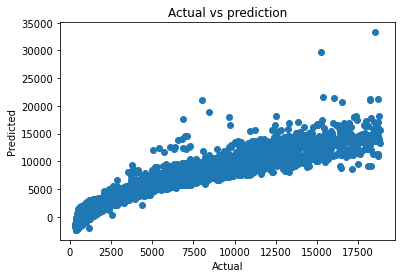

In [33]:
#Visualize
plt.scatter(y_test,y_pred)
plt.title("Actual vs prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

RESULTS FROM LINEAR REGRESSION DO NOT MAKE SENSE - negative predicted values, and predicted values way off

In [36]:
#Importing the dataset SET ASIDE FOR INPUT TO PREDICT, read straight from SQL
input_data=pd.read_sql_query('SELECT * FROM diamonds_shuf69sclnzparm_tail_3940', cnxn)
input_data.head(10)

,depth_scaled,table_scaled,cut_scaled,color_scaled,clarity_scaled,carat_scaled,price_USD,index_org
0,-0.243894,-0.652139,0.981473,-1.414272,2.397505,-0.987200,694.0,29200.0
1,-0.034486,-0.652139,0.981473,1.525021,1.183265,-0.607459,2718.0,53703.0
2,-0.941922,1.585529,0.085889,-0.238555,-1.245215,2.535955,17136.0,27011.0
3,-0.523105,-0.204605,0.981473,0.937163,-0.030975,-0.565266,1727.0,46017.0
4,0.454133,0.242928,-0.809695,-1.414272,-0.638095,-1.008297,388.0,41584.0
5,0.523936,-0.652139,0.981473,0.937163,-0.030975,-0.523072,2030.0,48842.0
6,-0.872119,-0.652139,0.981473,1.525021,-0.030975,-1.008297,758.0,31322.0
7,0.733344,-1.994739,0.981473,-0.238555,1.790385,-1.029394,1046.0,38798.0
8,-1.779555,1.137995,-0.809695,0.349304,-0.638095,-0.206621,2453.0,52058.0
9,-1.570147,1.137995,0.085889,0.349304,-0.030975,-1.008297,773.0,31770.0


In [37]:
#Defining X and y FROM INPUT
inp_X=input_data.iloc[:,0:6].values
inp_y=input_data.iloc[:,-2].values

In [38]:
inp_X

array([[-0.24389427, -0.65213854,  0.98147332, -1.41427211,  2.397505  ,
        -0.98720039],
       [-0.03448598, -0.65213854,  0.98147332,  1.52502147,  1.18326497,
        -0.60745904],
       [-0.94192191,  1.58552871,  0.08588908, -0.23855468, -1.24521508,
         2.53595544],
       ...,
       [ 2.12939968, -0.65213854, -2.60086361, -0.23855468,  1.18326497,
         1.48111837],
       [-2.05876612,  0.69046181,  0.08588908,  1.52502147, -1.24521508,
         0.44737803],
       [ 0.24472507, -0.65213854,  0.98147332, -2.00213083, -1.24521508,
         0.42628129]])

In [39]:
inp_y

array([  694.,  2718., 17136., ..., 13553.,  4672.,  3528.])

In [40]:
import time
start = time.time()
inpy_pred=regressor.predict(inp_X)
inpy_pred3940_time = time.time() - start
inpy_pred

array([ 1286.94974497,  3423.92511683, 13280.83440055, ...,
       10545.05293685,  5655.30976142,  3710.065039  ])

In [41]:
inpy_pred3940_time

0.0009744167327880859

In [42]:
Comparison=pd.DataFrame({"Actual:":inp_y,"Predicted:":inpy_pred})
print(Comparison.to_string()) 

      Actual:    Predicted:
0       694.0   1286.949745
1      2718.0   3423.925117
2     17136.0  13280.834401
3      1727.0   2240.311124
4       388.0  -1743.787877
5      2030.0   2381.870409
6       758.0    761.503417
7      1046.0   1256.567625
8      2453.0   2639.069163
9       773.0    -71.274027
10     1289.0   2776.716921
11    13908.0  12545.883091
12      689.0   -679.026691
13      814.0   1545.142939
14     2646.0   2934.260260
15    12291.0  11308.838924
16     4963.0   5551.816980
17     1122.0   1007.673646
18     5350.0   5825.432773
19      770.0    -88.910006
20     7764.0   8752.697296
21     1219.0    942.176637
22     1662.0   2168.366237
23      593.0  -1244.541634
24     1061.0    287.411251
25     2264.0   2577.196274
26      827.0    372.915579
27     4821.0   4485.578180
28    18741.0  13708.155099
29     8055.0   9440.453053
30     5846.0   6556.066671
31     4315.0   5576.196662
32     1046.0   1038.986707
33    11365.0   8411.650828
34      696.0    182

In [43]:
print("Mean squared error",metrics.mean_squared_error(inp_y,inpy_pred))
print("Mean absolute error",metrics.mean_absolute_error(inp_y,inpy_pred))
print("R2_Score:",metrics.r2_score(inp_y,inpy_pred))

Mean squared error 1615703.251914661
Mean absolute error 875.0348449650368
R2_Score: 0.9064124586825874


In [44]:
regressor.score(inp_X, inp_y)

0.9064124586825874

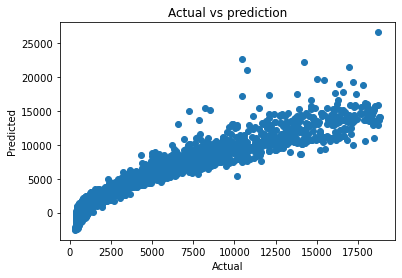

In [45]:
#Visualize
plt.scatter(inp_y,inpy_pred)
plt.title("Actual vs prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

#DO NOT INPUT TO SQL PREDICTION RESULTS FOR LINEAR REGRESSION - results DO NOT MAKE SENSE.

prediction_records = []
prediction_records.append({
    'model': 'LinearRegression',
    'prediction_time': inpy_pred3940_time,
    'r2': regressor.score(inp_y,inpy_pred),
    'MSE': metrics.mean_squared_error(inp_y,inpy_pred),
    'MAE': metrics.mean_absolute_error(inp_y,inpy_pred)})
prediction_records

prediction_records = pd.DataFrame(prediction_records,columns=['model','prediction_time','r2','MSE','MAE'])
prediction_records

cursor = cnxn.cursor()
prediction_insert = '''INSERT INTO ML_Predictions_Score_05oct (Model,Prediction_Time_3940_rows,Prediction_r2,Prediction_MSE,Prediction_MAE)
               VALUES (?,?,?,?,?)
'''
for rec in prediction_records.iterrows():
    values = (
        rec[1]['model'],
        rec[1]['prediction_time'],
        rec[1]['r2'],
        rec[1]['MSE'],
        rec[1]['MAE']
    )
cursor.execute(prediction_insert, values)
cnxn.commit()
cursor.close()
print("Input Parameter_Score Done!")